In [2]:
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
import ast
import itertools
from gensim import corpora, models
import re
import math

# Data Preprocessing

### Put file name into list

In [9]:
#Get name of documents in each quarter

all_files2013 = []
all_files2014 = []

for filename in os.listdir('./2013'):
    all_files2013.append('./2013/'+filename)
    
for filename in os.listdir('./2014'):
    all_files2014.append('./2014/'+filename)

### Put quarterly documents in one file and Read

In [10]:
file2013_q1 = all_files2013[0:90]
file2013_q2 = all_files2013[91:181]
file2013_q3 = all_files2013[182:273]
file2013_q4 = all_files2013[274:365]
file2014_q1 = all_files2014[0:90]
file2014_q2 = all_files2014[91:181]
file2014_q3 = all_files2014[182:273]
file2014_q4 = all_files2014[274:365]

In [1193]:
#write the readlines into the txt

def get_quater (namelist,name):
    dicts = []
    for i , file in enumerate(namelist):
        #print (file)
        with open(file,encoding='utf-8',errors='ignore') as f:
            articles = []
            for article in f:
                article = nltk.sent_tokenize(article)
                articles.append(article)
                #print (articles)
        dicts.append(articles)
    #print (dicts[0])
    with open(name,'w',encoding='utf-8') as q:
        q.write(str(dicts))

In [5]:
get_quater(file2013_q1,'2013q1.txt') 

In [6]:
get_quater(file2013_q2,'2013q2.txt')

In [7]:
get_quater(file2013_q3,'2013q3.txt')

In [8]:
get_quater(file2013_q4,'2013q4.txt')

In [9]:
get_quater(file2014_q1,'2014q1.txt')

In [10]:
get_quater(file2014_q2,'2014q2.txt')

In [11]:
get_quater(file2014_q3,'2014q3.txt')

In [12]:
get_quater(file2014_q4,'2014q4.txt')

In [15]:
#read articles from txt

def read_articles(filename):
    with open(filename , 'r' ,encoding='utf-8' ,errors='ignore') as a:
        corpus = ast.literal_eval(a.read())
    corpus = list(itertools.chain(*corpus))
    
    return corpus

In [16]:
q1_2013 = read_articles('2013q1.txt')

In [17]:
q2_2013 = read_articles('2013q2.txt')

In [18]:
q3_2013 = read_articles('2013q3.txt')

In [19]:
q4_2013 = read_articles('2013q4.txt')

In [20]:
q1_2014 = read_articles('2014q1.txt')

In [21]:
q2_2014 = read_articles('2014q2.txt')

In [22]:
q3_2014 = read_articles('2014q3.txt')

In [23]:
q4_2014 = read_articles('2014q4.txt')

In [307]:
all_articles = read_articles('all_articles.txt')

### Word tokenize and Remove stopwords

In [15]:
def get_words (articles):
    word_list = []
    for i in range(len(articles)):
        words = nltk.word_tokenize(re.sub('\W+', ' ',str(articles[i])).replace("_",' ').lower())
        stop_words = stopwords.words("english")
        #remove stopwords
        result = [word for word in words if word not in stop_words]
        word_list.append(result)
    return word_list

In [25]:
w1_2013 = get_words(q1_2013)

In [26]:
w2_2013 = get_words(q2_2013)

In [27]:
w3_2013 = get_words(q3_2013)

In [28]:
w4_2013 = get_words(q4_2013)

In [29]:
w1_2014 = get_words(q1_2014)

In [30]:
w2_2014 = get_words(q2_2014)

In [31]:
w3_2014 = get_words(q3_2014)

In [32]:
w4_2014 = get_words(q4_2014)

In [308]:
wall_articles = get_words(all_articles)

# LDA Model Implementation

### Data Transformation: Corpus and Dictionary

In [33]:
def get_dict(word_list):
    dictionary = corpora.Dictionary(word_list)
    corpus = [dictionary.doc2bow(words) for words in word_list]
    return corpus,dictionary

In [34]:
dict1_2013 , dictionary_2013q1 = get_dict(w1_2013)

In [35]:
dict2_2013 , dictionary_2013q2 = get_dict(w2_2013)

In [36]:
dict3_2013 , dictionary_2013q3 = get_dict(w3_2013)

In [37]:
dict4_2013 , dictionary_2013q4 = get_dict(w4_2013)

In [38]:
dict1_2014 , dictionary_2014q1 = get_dict(w1_2014)

In [39]:
dict2_2014 , dictionary_2014q2 = get_dict(w2_2014)

In [40]:
dict3_2014 , dictionary_2014q3 = get_dict(w3_2014)

In [41]:
dict4_2014 , dictionary_2014q4 = get_dict(w4_2014)

In [310]:
dictall,dictionary_all = get_dict(wall_articles)

### Validation set and Train set

In [589]:
#define validation set and train set

train_set = w1_2013[0:3000].copy()
validation_set = w1_2013[3001:4819].copy()

In [591]:
len(validation_set)

1818

In [592]:
#create dictionary for validation set and train set

train_dict ,dictionary_train = get_dict(train_set)

In [593]:
validation_dict , dictionary_validation = get_dict(validation_set)

### Build LDA Model

In [608]:
#calculate perplexity for different numbers of topics
def perplexity(num_topic,dict_ ,dictionary_):
    lda_train = models.ldamodel.LdaModel(corpus=dict_ , id2word = dictionary_ ,num_topics=num_topic)
    topict_list = []
    for topic in lda_train.print_topics(num_topics=50):
        topict_list.append(topic)
    aaa= []
    aaaa = []
    for i in range(len(topict_list)):
        aa = nltk.word_tokenize(re.sub('\W+', ' ',str(topict_list[i])).replace("_",' ').lower())
        for i in range(len(aa)):
            aaab = re.findall(r'[a-z]+' , aa[i])
            aaa.append(aaab)
        #print (aaa)
    for j in range (len(aaa)):
        if aaa[j] !=[]:
            #rint (aaa[j])
            aaaa.append(aaa[j])
    topic_word_list = []
    for i in range(len(aaaa)):
        #print (str(aaaa[i])+str(i))
        for letter in aaaa[i]:
            letter = re.sub('\W+', ' ',str(letter).replace("_",' '))
            topic_word_list.append(letter)
            
            
    freq = []
    letter_list = []
    for i in range(len(topic_word_list)):
        if topic_word_list[i] not in letter_list:
            #print(topic_word_list[i])
            letter_list.append(topic_word_list[i])
            for j in range(len(dictionary_2013q1)):
                if dictionary_2013q1[j] == topic_word_list[i]:
                        freq.append(j)
    #print (freq)
    
    a =0.0
    for each in freq:
        if each != None:
            a+=float(each)
        else:
            pass
    #print (a)
    duishu = -math.log(a)
    kuohaoli = duishu/len(dictionary_2013q1)
    perp = math.exp(kuohaoli)
    #print (perp) 
    return (perp)

In [316]:
def garph_draw(num_topic , perp):
    x = num_topic
    y = perp
    plt.plot(x , y , color = 'red' ,linewidth = 2)
    plt.xlabel("num_topic")
    plt.ylabel("perp")
    plt.show()

In [609]:
result_list = []
for i in range(1,20):
    perp = perplexity(i,train_dict,dictionary_train)
    result_list.append(str(i)+':'+str(perp))

In [3]:
import matplotlib.pyplot as plt

In [610]:
#deal with perp's result
topic2 = []
for i in range(1,20):
    topic2.append(i)

In [611]:
#deal with perp's result
perp_list1 = []
for i in range(len(result_list)):
    if i < 10 :
        perp_list1.append(float(result_list[i][3:]))
    else :
        perp_list1.append(float(result_list[i][3:]))

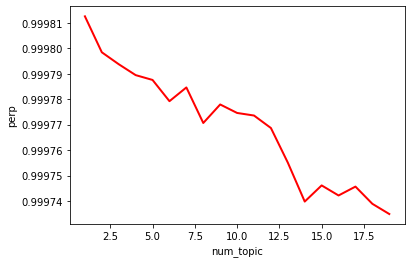

In [612]:
#Line digram for the relationship between perplexity and numbers of topics 
#in Train set
garph_draw(topic2,perp_list1)

In [613]:
#num_topic= 14
#in Validation set
result_validation = []
perp = perplexity(14,validation_dict,dictionary_validation)
result_validation.append(perp)

In [615]:
#Test the accurcy about perp
#Assume num_topic= 10
result_validation1 = []
perp = perplexity(10,validation_dict,dictionary_validation)
result_validation1.append(perp)

In [616]:
result_validation1

[0.999774905431217]

In [614]:
result_validation

[0.9997698381800496]

### Get LDA result when num_topic= 14 

In [617]:
lda_2013q1 = models.ldamodel.LdaModel(corpus=dict1_2013 , id2word = dictionary_2013q1 ,num_topics=14)

In [618]:
lda_2013q2 = models.ldamodel.LdaModel(corpus=dict2_2013 , id2word = dictionary_2013q2 ,num_topics=14)

In [619]:
lda_2013q3 = models.ldamodel.LdaModel(corpus=dict3_2013 , id2word = dictionary_2013q3 ,num_topics=14)

In [620]:
lda_2013q4 = models.ldamodel.LdaModel(corpus=dict4_2013 , id2word = dictionary_2013q4 ,num_topics=14)

In [621]:
lda_2014q1 = models.ldamodel.LdaModel(corpus=dict1_2014 , id2word = dictionary_2014q1 ,num_topics=14)

In [622]:
lda_2014q2 = models.ldamodel.LdaModel(corpus=dict2_2014 , id2word = dictionary_2014q2 ,num_topics=14)

In [623]:
lda_2014q3 = models.ldamodel.LdaModel(corpus=dict3_2014 , id2word = dictionary_2014q3 ,num_topics=14)

In [624]:
lda_2014q4 = models.ldamodel.LdaModel(corpus=dict4_2014 , id2word = dictionary_2014q4 ,num_topics=14)

In [625]:
lda_all = models.ldamodel.LdaModel(corpus=dictall , id2word = dictionary_all ,num_topics=14)

### Select Each Topic’s keywords

### "2013 Q1"
###### topic1 -----tax, topic2 -----stock ,topic3 -----china, topic4 -----percent, topic5 -----business,topic6 -----recession ,topic7 -----investors ,topic8 -----banks ,topic9 -----market ,topic10----economic ,topic11----bailout ,topic12----economy ,topic13----financial ,topic14----foreclosure 

In [1177]:
topic_list2013q1 = []
for topic in lda_2013q1.print_topics(num_topics=17):
    topic_list2013q1.append(topic)

In [1178]:
#get keywords for topic_list2013q1 according to content
topic_list2013q1

[(0,
  '0.007*"would" + 0.006*"said" + 0.005*"tax" + 0.004*"new" + 0.004*"1" + 0.004*"government" + 0.003*"one" + 0.003*"people" + 0.003*"years" + 0.003*"000"'),
 (1,
  '0.004*"year" + 0.004*"market" + 0.004*"time" + 0.004*"stock" + 0.004*"one" + 0.004*"new" + 0.003*"said" + 0.003*"million" + 0.003*"apple" + 0.003*"company"'),
 (2,
  '0.070*"u" + 0.007*"china" + 0.005*"said" + 0.005*"would" + 0.004*"one" + 0.003*"korea" + 0.003*"chinese" + 0.003*"people" + 0.003*"new" + 0.003*"year"'),
 (3,
  '0.028*"percent" + 0.010*"0" + 0.010*"1" + 0.009*"year" + 0.008*"billion" + 0.008*"2" + 0.007*"3" + 0.006*"4" + 0.006*"6" + 0.006*"5"'),
 (4,
  '0.007*"company" + 0.005*"new" + 0.005*"said" + 0.005*"one" + 0.005*"business" + 0.004*"investors" + 0.004*"also" + 0.004*"market" + 0.004*"year" + 0.003*"stock"'),
 (5,
  '0.007*"year" + 0.006*"market" + 0.005*"recession" + 0.004*"chart" + 0.004*"time" + 0.004*"last" + 0.004*"growth" + 0.004*"since" + 0.004*"new" + 0.003*"lululemon"'),
 (6,
  '0.009*"mark

### "2013 Q2"

##### 1-gold,2-bank,3-policy,4-financial,5-company,6-obama,7-business,8-fed,9-bitcoin,10-fund,11-percent,12-market,13-investment,14-china

In [1179]:
topic_list2013q2 = []
for topic in lda_2013q2.print_topics(num_topics=17):
    topic_list2013q2.append(topic)

In [1180]:
topic_list2013q2

[(0,
  '0.004*"year" + 0.004*"said" + 0.004*"new" + 0.003*"people" + 0.003*"greenlight" + 0.003*"also" + 0.003*"einhorn" + 0.003*"percent" + 0.003*"gold" + 0.002*"market"'),
 (1,
  '0.009*"said" + 0.006*"one" + 0.004*"would" + 0.004*"also" + 0.004*"time" + 0.003*"year" + 0.003*"two" + 0.003*"u" + 0.003*"people" + 0.003*"bank"'),
 (2,
  '0.016*"gold" + 0.009*"said" + 0.007*"inflation" + 0.006*"policy" + 0.006*"fed" + 0.005*"prices" + 0.005*"market" + 0.004*"would" + 0.004*"rate" + 0.004*"monetary"'),
 (3,
  '0.006*"market" + 0.006*"said" + 0.005*"people" + 0.005*"north" + 0.004*"year" + 0.004*"years" + 0.004*"time" + 0.004*"one" + 0.003*"money" + 0.003*"world"'),
 (4,
  '0.006*"said" + 0.006*"bank" + 0.006*"one" + 0.005*"would" + 0.005*"company" + 0.004*"get" + 0.003*"world" + 0.003*"could" + 0.003*"financial" + 0.003*"people"'),
 (5,
  '0.009*"said" + 0.007*"obama" + 0.007*"would" + 0.004*"u" + 0.004*"government" + 0.004*"people" + 0.004*"also" + 0.004*"president" + 0.004*"year" + 0.00

### "2013 Q3"

##### 1-housing,2-debt,3-growth,4-apple,5-fund,6-rate,7-prices,8-house,9-index,10-fed,11-emerging,12-mortgage,13-business,14-bank

In [1181]:
topic_list2013q3 = []
for topic in lda_2013q3.print_topics(num_topics=17):
    topic_list2013q3.append(topic)

In [1182]:
topic_list2013q3

[(0,
  '0.005*"new" + 0.005*"one" + 0.005*"said" + 0.005*"market" + 0.004*"year" + 0.004*"would" + 0.004*"home" + 0.003*"also" + 0.003*"housing" + 0.003*"could"'),
 (1,
  '0.008*"said" + 0.006*"market" + 0.006*"fed" + 0.005*"debt" + 0.004*"would" + 0.004*"one" + 0.004*"new" + 0.004*"year" + 0.004*"markets" + 0.003*"first"'),
 (2,
  '0.007*"market" + 0.006*"year" + 0.005*"growth" + 0.004*"would" + 0.004*"fed" + 0.004*"time" + 0.003*"1" + 0.003*"new" + 0.003*"also" + 0.003*"one"'),
 (3,
  '0.010*"apple" + 0.007*"new" + 0.006*"xa0" + 0.005*"market" + 0.005*"time" + 0.004*"one" + 0.004*"company" + 0.004*"gold" + 0.004*"like" + 0.004*"street"'),
 (4,
  '0.005*"fund" + 0.005*"said" + 0.005*"one" + 0.005*"financial" + 0.005*"funds" + 0.005*"market" + 0.004*"years" + 0.004*"investors" + 0.004*"new" + 0.004*"investment"'),
 (5,
  '0.006*"said" + 0.006*"billion" + 0.005*"1" + 0.005*"would" + 0.005*"rate" + 0.004*"7" + 0.004*"3" + 0.004*"year" + 0.004*"percent" + 0.004*"2"'),
 (6,
  '0.009*"1" + 

### "2013 Q4"

##### 1-index,2-government,3-data,4-company,5-economy,6-job,7-Hong Kong,8-Market,9-bitcoin,10-debt,11-gold,12-currency,13-inflation,14-reuters

In [1183]:
topic_list2013q4 = []
for topic in lda_2013q4.print_topics(num_topics=17):
    topic_list2013q4.append(topic)

In [1184]:
topic_list2013q4

[(0,
  '0.013*"year" + 0.011*"0" + 0.011*"1" + 0.010*"percent" + 0.009*"index" + 0.008*"2" + 0.007*"month" + 0.007*"5" + 0.007*"growth" + 0.006*"december"'),
 (1,
  '0.004*"said" + 0.004*"would" + 0.004*"number" + 0.004*"year" + 0.003*"one" + 0.003*"new" + 0.003*"1" + 0.003*"market" + 0.003*"government" + 0.002*"people"'),
 (2,
  '0.008*"data" + 0.006*"business" + 0.005*"bloomberg" + 0.005*"new" + 0.004*"bitcoin" + 0.004*"000" + 0.004*"insider" + 0.004*"one" + 0.004*"market" + 0.004*"also"'),
 (3,
  '0.007*"new" + 0.006*"one" + 0.006*"said" + 0.005*"company" + 0.005*"wall" + 0.005*"like" + 0.005*"street" + 0.004*"year" + 0.004*"million" + 0.004*"business"'),
 (4,
  '0.012*"economy" + 0.009*"fed" + 0.008*"policy" + 0.006*"growth" + 0.006*"china" + 0.005*"fiscal" + 0.005*"economic" + 0.005*"rates" + 0.005*"monetary" + 0.005*"rate"'),
 (5,
  '0.008*"said" + 0.004*"one" + 0.004*"year" + 0.004*"government" + 0.004*"000" + 0.004*"job" + 0.003*"cattle" + 0.003*"jobs" + 0.003*"according" + 0.0

### "2014 Q1"

##### 1---free , 2---shoe, 3---New York,4---government,5---street,6---appdownload,7---market,8---business,9---Australia,10---bitcoin,11---company ,12--- apple,13---china  14---unemployment

In [1185]:
topic_list2014q1 = []
for topic in lda_2014q1.print_topics(num_topics=17):
    topic_list2014q1.append(topic)

In [1186]:
topic_list2014q1

[(0,
  '0.006*"new" + 0.005*"one" + 0.004*"would" + 0.004*"like" + 0.004*"people" + 0.004*"said" + 0.004*"time" + 0.003*"get" + 0.003*"could" + 0.003*"free"'),
 (1,
  '0.006*"shoe" + 0.006*"market" + 0.006*"biotech" + 0.005*"new" + 0.005*"labor" + 0.004*"last" + 0.004*"3" + 0.004*"sales" + 0.004*"said" + 0.004*"since"'),
 (2,
  '0.009*"new" + 0.006*"free" + 0.005*"york" + 0.005*"people" + 0.005*"migration" + 0.005*"appdownload" + 0.005*"cities" + 0.005*"twitter" + 0.004*"business" + 0.004*"com"'),
 (3,
  '0.010*"said" + 0.005*"people" + 0.004*"new" + 0.004*"also" + 0.004*"would" + 0.004*"government" + 0.003*"putin" + 0.003*"one" + 0.003*"two" + 0.003*"business"'),
 (4,
  '0.006*"said" + 0.006*"year" + 0.005*"street" + 0.005*"wall" + 0.005*"free" + 0.004*"new" + 0.004*"billion" + 0.004*"appdownload" + 0.004*"one" + 0.003*"would"'),
 (5,
  '0.005*"appdownload" + 0.005*"lululemon" + 0.004*"market" + 0.004*"year" + 0.004*"markets" + 0.004*"free" + 0.004*"china" + 0.004*"said" + 0.004*"emer

### "2014 Q2"

##### 1--- growth 2---free,3---company,4---business ,5---market ,6---rate,7---appdownload,8---free,9---inflation,10---sales , 11---AMP ,12---business,13---bank,14---investment

In [1187]:
topic_list2014q2 = []
for topic in lda_2014q2.print_topics(num_topics=17):
    topic_list2014q2.append(topic)

In [1188]:
topic_list2014q2

[(0,
  '0.007*"1" + 0.006*"0" + 0.006*"year" + 0.006*"2" + 0.005*"growth" + 0.005*"may" + 0.004*"free" + 0.004*"market" + 0.004*"appdownload" + 0.004*"said"'),
 (1,
  '0.006*"said" + 0.005*"year" + 0.005*"new" + 0.005*"would" + 0.005*"free" + 0.004*"last" + 0.004*"appdownload" + 0.003*"years" + 0.003*"percent" + 0.003*"1"'),
 (2,
  '0.011*"said" + 0.007*"company" + 0.007*"year" + 0.005*"million" + 0.005*"u" + 0.005*"1" + 0.005*"billion" + 0.004*"shares" + 0.004*"free" + 0.004*"000"'),
 (3,
  '0.004*"people" + 0.004*"one" + 0.004*"would" + 0.004*"new" + 0.003*"time" + 0.003*"business" + 0.003*"like" + 0.003*"money" + 0.003*"said" + 0.003*"also"'),
 (4,
  '0.008*"company" + 0.006*"year" + 0.006*"billion" + 0.004*"million" + 0.004*"new" + 0.004*"business" + 0.004*"1" + 0.004*"would" + 0.003*"said" + 0.003*"market"'),
 (5,
  '0.005*"would" + 0.004*"market" + 0.004*"one" + 0.004*"time" + 0.003*"rate" + 0.003*"year" + 0.003*"said" + 0.003*"years" + 0.003*"policy" + 0.003*"new"'),
 (6,
  '0.0

###  "2014 Q3"

####  1---growth 2---appdownload 3---apple 4---oil 5---dollar 6~Russia 7---company 8---PIMCO 9---Argentina 10---tesla 11---government 12---food 13---funds 14---fed

In [1189]:
topic_list2014q3 = []
for topic in lda_2014q3.print_topics(num_topics=17):
    topic_list2014q3.append(topic)

In [1190]:
topic_list2014q3

[(0,
  '0.009*"said" + 0.006*"year" + 0.005*"percent" + 0.005*"growth" + 0.005*"economy" + 0.004*"1" + 0.004*"0" + 0.004*"bank" + 0.004*"also" + 0.004*"china"'),
 (1,
  '0.008*"year" + 0.006*"new" + 0.005*"said" + 0.005*"free" + 0.004*"1" + 0.004*"percent" + 0.004*"appdownload" + 0.004*"one" + 0.004*"time" + 0.004*"also"'),
 (2,
  '0.007*"year" + 0.006*"said" + 0.006*"apple" + 0.005*"one" + 0.005*"million" + 0.005*"company" + 0.005*"free" + 0.005*"people" + 0.005*"cisco" + 0.004*"business"'),
 (3,
  '0.010*"said" + 0.006*"new" + 0.005*"appdownload" + 0.005*"bank" + 0.004*"free" + 0.004*"one" + 0.004*"company" + 0.004*"sand" + 0.004*"york" + 0.003*"video"'),
 (4,
  '0.011*"said" + 0.007*"bank" + 0.006*"dollar" + 0.005*"china" + 0.005*"year" + 0.004*"percent" + 0.004*"reuters" + 0.004*"free" + 0.004*"u" + 0.004*"hong"'),
 (5,
  '0.019*"u" + 0.010*"said" + 0.005*"oil" + 0.005*"1" + 0.005*"new" + 0.005*"russia" + 0.005*"year" + 0.004*"reuters" + 0.004*"free" + 0.004*"russian"'),
 (6,
  '0.

### "2014 Q4"

####  1---ECB 2---company 3---bank 4---Hamm 5---market 6---free 7---reuters 8---stocks 9---oil 10---financial 11---appdownload 12---credit 13---prices 14---Amazon

In [1191]:
topic_list2014q4 = []
for topic in lda_2014q4.print_topics(num_topics=17):
    topic_list2014q4.append(topic)

In [1192]:
topic_list2014q4

[(0,
  '0.006*"ecb" + 0.005*"said" + 0.004*"new" + 0.004*"growth" + 0.004*"would" + 0.004*"year" + 0.003*"market" + 0.003*"could" + 0.003*"bank" + 0.003*"inflation"'),
 (1,
  '0.009*"million" + 0.008*"year" + 0.007*"billion" + 0.005*"quarter" + 0.005*"company" + 0.005*"said" + 0.005*"1" + 0.004*"2" + 0.004*"5" + 0.004*"new"'),
 (2,
  '0.004*"wine" + 0.004*"free" + 0.004*"said" + 0.003*"appdownload" + 0.003*"new" + 0.003*"market" + 0.003*"us" + 0.003*"years" + 0.003*"also" + 0.002*"world"'),
 (3,
  '0.005*"hamm" + 0.005*"company" + 0.004*"said" + 0.004*"year" + 0.003*"oil" + 0.003*"one" + 0.003*"continental" + 0.003*"also" + 0.003*"new" + 0.003*"billion"'),
 (4,
  '0.007*"said" + 0.006*"new" + 0.005*"would" + 0.004*"year" + 0.004*"one" + 0.004*"time" + 0.004*"us" + 0.004*"could" + 0.004*"company" + 0.004*"market"'),
 (5,
  '0.006*"one" + 0.005*"said" + 0.005*"new" + 0.004*"us" + 0.004*"free" + 0.004*"business" + 0.003*"year" + 0.003*"also" + 0.003*"would" + 0.003*"million"'),
 (6,
  '0.

### "All articles"

#### 1--- russia 2---european 3---percent 4---policy 5---tax 6---oil 7---gold 8---people 9---growth 10---bank 11---New York 12---appdownload 13---stock 14---economy 

In [1175]:
topic_listall = []
topic_list2014q4 = []
for topic in lda_all.print_topics(num_topics=17):
    topic_listall.append(topic)

In [1176]:
topic_listall

[(0,
  '0.021*"said" + 0.014*"u" + 0.008*"russia" + 0.007*"russian" + 0.006*"reuters" + 0.005*"new" + 0.005*"court" + 0.004*"china" + 0.004*"sanctions" + 0.004*"government"'),
 (1,
  '0.017*"european" + 0.013*"ecb" + 0.012*"euro" + 0.011*"europe" + 0.010*"eu" + 0.010*"minister" + 0.010*"france" + 0.010*"said" + 0.009*"germany" + 0.009*"german"'),
 (2,
  '0.022*"1" + 0.020*"0" + 0.018*"2" + 0.015*"percent" + 0.015*"year" + 0.013*"3" + 0.013*"5" + 0.012*"4" + 0.012*"appdownload" + 0.010*"6"'),
 (3,
  '0.016*"policy" + 0.013*"inflation" + 0.012*"rate" + 0.011*"fed" + 0.011*"federal" + 0.010*"committee" + 0.009*"economic" + 0.007*"monetary" + 0.007*"financial" + 0.007*"would"'),
 (4,
  '0.018*"tax" + 0.013*"would" + 0.012*"said" + 0.011*"obama" + 0.010*"house" + 0.009*"president" + 0.008*"government" + 0.007*"budget" + 0.006*"senate" + 0.005*"congress"'),
 (5,
  '0.017*"oil" + 0.008*"said" + 0.008*"company" + 0.007*"million" + 0.006*"year" + 0.006*"new" + 0.006*"energy" + 0.005*"companies"

# TF-IDF

In [1]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:
import string

In [5]:
transform = TfidfTransformer()

In [6]:
vectorizer = CountVectorizer()

### Read articles day by day 

In [7]:
def read_txt(filename):
    list_name = []
    for line in open(filename,'r',encoding='utf-8' , errors='ignore'):
        list_name.append(str(line).replace('\n',''))
        
    return list_name

In [11]:
#get articles from day's article
daybyday = []
for filename in file2013_q1:
    daybyday.append(read_txt(filename))

In [12]:
#Divide dataset by days
names = locals()
for i in range(0,90):
    names['d2013%s' % i] = daybyday[i]

In [19]:
doc_q1 = read_txt('./2013q1.txt')

### Remove stopwords 

In [13]:
def delete_words(doclist):
    getwords = get_words(doclist)
    words = []
    words.append(str(getwords).replace('[' , '').replace(']','').replace('\'','').replace(',' , ' '))
    return words

In [16]:
#Use delete_words and get wordlist
#word_day0   ----  word_day89
namedf = locals()
for i in range(0,90):
    namedf['word_day%s' % i ] = delete_words(namedf['d2013%s'%i])

In [20]:
#This is the first quater of 2013
word_q1 = delete_words(doc_q1)

In [21]:
#calculate TF-IDFscore 
#(getword_tf:getvalue_tf)
def get_tfidf(corpus):
    X = vectorizer.fit_transform(corpus)
    tfidf = transform.fit_transform(X)
    tfidf_dict = {}
    words_tf = vectorizer.get_feature_names()
    weight = tfidf.toarray()
    for i in range(len(weight)):
        for j in range(len(words_tf)):
            getword_tf = words_tf[j]
            getvalue_tf = weight[i][j]
        #print (getword_tf)
        #print (getvalue_tf)
            if getvalue_tf != 0:
                tfidf_dict.update({getword_tf:getvalue_tf})
    #sort word by value in descending order
    df = pd.DataFrame(sorted(tfidf_dict.items(), key = lambda d:d[1] , reverse=True))
    return df

In [22]:
#Use get_tfidf get vector
#df_day0-----df_day89
namedf = locals()
for i in range(0,90):
    namedf['df_day%s' % i ] = get_tfidf(namedf['word_day%s'%i])

In [23]:
#show result
df_day0.head(3)

,0,1
0,growth,0.400145
1,market,0.271066
2,stock,0.223737


In [24]:
##This is the tfidf form first quater of 2013
df_2013q1 = get_tfidf(word_q1)

In [25]:
#show result
df_2013q1.head(3)

,0,1
0,year,0.201241
1,would,0.178103
2,percent,0.166534


In [26]:
#add topic words into df_2013q1
df_2013q1[df_2013q1[0] == 'bank']

,0,1
13,bank,0.097197


In [27]:
df_2013q1[df_2013q1[0] == 'percent']

,0,1
2,percent,0.166534


In [28]:
df_2013q1[df_2013q1[0] == 'sales']

,0,1
48,sales,0.064221


In [29]:
#index over 500
df_2013q1[df_2013q1[0] == 'euros']

,0,1
1102,euros,0.00728


In [30]:
df_2013q1[df_2013q1[0] == 'company']

,0,1
21,company,0.083227


In [31]:
#index over 500
df_2013q1[df_2013q1[0] == 'russian']

,0,1
765,russian,0.010349


In [32]:
df_2013q1[df_2013q1[0] == 'apple']

,0,1
79,apple,0.049936


In [33]:
#index over 500
df_2013q1[df_2013q1[0] == 'dell']

,0,1
637,dell,0.012396


In [34]:
#index over 500
df_2013q1[df_2013q1[0] == 'foreclosure']

,0,1
1523,foreclosure,0.005076


In [35]:
df_2013q1[df_2013q1[0] == 'countries']

,0,1
180,countries,0.030576


In [36]:
df_2013q1[df_2013q1[0] == 'obama']

,0,1
174,obama,0.03215


In [37]:
df_2013q1[df_2013q1[0] == 'gold']

,0,1
91,gold,0.044506


In [38]:
df_2013q1[df_2013q1[0] == 'oil']

,0,1
102,oil,0.043129


In [39]:
df_2013q1[df_2013q1[0] == 'market']

,0,1
4,market,0.162913


In [40]:
df_2013q1[df_2013q1[0] == 'china']

,0,1
58,china,0.058948


In [41]:
df_2013q1[df_2013q1[0] == 'financial']

,0,1
23,financial,0.082362


In [42]:
##在500+
df_2013q1[df_2013q1[0] == 'iphone']

,0,1
1066,iphone,0.007516


### Add Topic "euros", "russian", "dell", "foreclosure", "iphone"

In [43]:
#because we had sorted before ,we can get top 500 from dataframe
feature_df = df_2013q1[0:500]

In [44]:
#add topic words into dataframe
feature_df = feature_df.append(df_2013q1[765:766])

In [45]:
feature_df = feature_df.append(df_2013q1[1102:1103])

In [46]:
feature_df = feature_df.append(df_2013q1[637:638])

In [47]:
feature_df = feature_df.append(df_2013q1[1523:1524])

In [48]:
feature_df = feature_df.append(df_2013q1[1066:1067])

In [49]:
#show result and please ignore index
feature_df

,0,1
0,year,0.201241
1,would,0.178103
2,percent,0.166534
3,new,0.166179
4,market,0.162913
...,...,...
765,russian,0.010349
1102,euros,0.007280
637,dell,0.012396
1523,foreclosure,0.005076


In [50]:
#reshape dataframe
df2 = feature_df.stack()

In [51]:
#reshape dataframe
df3 = df2.unstack(0)

In [52]:
#get keywords list 
columns = []
for i in range(0,505):
    columns.append(df3.iloc[0,i])

In [53]:
len(columns)

505

In [54]:
#use keywords to name columns
df3.columns = columns

In [55]:
#get the final dataframe 
feature_q1 = df3[1:2]

In [56]:
#show 2013 quatre 1' feature
feature_q1

,year,would,percent,new,market,said,one,also,time,last,...,cypriot,david,using,cliff,instead,russian,euros,dell,foreclosure,iphone
1,0.201241,0.178103,0.166534,0.166179,0.162913,0.156696,0.152525,0.122933,0.117345,0.115613,...,0.0151895,0.0151895,0.0151895,0.0151501,0.0151108,0.0103493,0.00727994,0.0123956,0.00507628,0.00751604


### Process on all documents in 2013 Q1

In [57]:
feawords = columns.copy()

In [58]:
#define a function to select 505 words from feature_q1
def deal_doc(df_dayi):
    df_day = pd.DataFrame({0:[],1:[]})
    for i in range(len(feawords)):
        
        if str(df_dayi[df_dayi[0] == 'aaabhwiska']) ==  str(df_dayi[df_dayi[0] == feawords[i] ]):
            
            df_day = df_day.append({0:feawords[i],1:0.0},ignore_index=True)
        
        else :
            
            df_day = df_day.append(df_dayi[df_dayi[0] == feawords[i]],ignore_index=True)
        
        
    return df_day

In [59]:
#feature_day0-----feature_day89 is the result from articles day by day
namefea = locals()
for i in range(0,90):
    namefea['feature_day%s' % i ] = deal_doc(namefea['df_day%s' % i])

In [975]:
feature_q1

,year,would,percent,new,market,said,one,also,time,last,...,cypriot,david,using,cliff,instead,russian,euros,dell,foreclosure,iphone
1,0.201241,0.178103,0.166534,0.166179,0.162913,0.156696,0.152525,0.122933,0.117345,0.115613,...,0.0151895,0.0151895,0.0151895,0.0151501,0.0151108,0.0103493,0.00727994,0.0123956,0.00507628,0.00751604


In [60]:
#reshape dataframe
def set_colunm(dataframe):
    df1 = dataframe.stack()
    df2 = df1.unstack(0)
    df2.columns = columns
    df_result = df2[1:2]
    return df_result

In [61]:
nameset = locals()
for i in range(0,90):
    nameset['feature_day%s'%i] = set_colunm(nameset['feature_day%s'%i])

In [62]:
#add other articles's features into the final dataframe
for i in range(0,90):
    feature_q1 = feature_q1.append(nameset['feature_day%s'%i])

In [63]:
#reset index
feature_q1 = feature_q1.reset_index(drop = True)

In [64]:
feature = feature_q1

In [65]:
feature

,year,would,percent,new,market,said,one,also,time,last,...,cypriot,david,using,cliff,instead,russian,euros,dell,foreclosure,iphone
0,0.201241,0.178103,0.166534,0.166179,0.162913,0.156696,0.152525,0.122933,0.117345,0.115613,...,0.0151895,0.0151895,0.0151895,0.0151501,0.0151108,0.0103493,0.00727994,0.0123956,0.00507628,0.00751604
1,0.133382,0.103263,0.0215132,0.0903554,0.271066,0.0344211,0.0731448,0.094658,0.0731448,0.0860528,...,0,0.00860528,0.00430264,0.0774475,0.00430264,0,0,0,0,0
2,0.202364,0.111032,0.146849,0.164757,0.0913326,0.100287,0.109241,0.103868,0.0787968,0.0823784,...,0,0.010745,0.00716334,0.121777,0.0125358,0.00179084,0.00179084,0,0,0
3,0.155651,0.137691,0.11574,0.171615,0.187579,0.045897,0.119731,0.0858075,0.0957851,0.0798209,...,0,0.0159642,0.00997762,0.0439015,0.0139687,0.00399105,0,0.00798209,0,0
4,0.283084,0.181797,0.192186,0.114273,0.148035,0.11687,0.0597334,0.0805102,0.0649276,0.109078,...,0,0.0129855,0.0103884,0.0467479,0.0129855,0.0025971,0,0,0,0.0155826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.116043,0.151501,0.151501,0.125714,0.109596,0.135384,0.106373,0.0741388,0.13216,0.0967028,...,0.0386811,0.00967028,0.0161171,0,0.0161171,0.00322343,0.00322343,0.0161171,0,0
87,0.149319,0.109258,0.20759,0.138393,0.105616,0.131109,0.138393,0.105616,0.116542,0.142035,...,0.0291354,0.0145677,0.00728386,0.0109258,0.0109258,0.00364193,0.0327774,0.00364193,0.050987,0.00364193
88,0.0809809,0.103476,0.0854799,0.166461,0.166461,0.12597,0.116972,0.076482,0.157463,0.071983,...,0.00449894,0.0224947,0.00899788,0,0.0179958,0,0,0.00899788,0.0494883,0
89,0.0768775,0.145213,0.0640646,0.0811484,0.0726065,0.106774,0.0683355,0.0469807,0.0811484,0.0469807,...,0.0726065,0.00854194,0.0170839,0.0128129,0.00854194,0.00427097,0.0298968,0,0,0


# PCA

In [210]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [66]:
arrfea = feature.values

In [68]:
X_scaler = StandardScaler()

In [69]:
x = X_scaler.fit_transform(arrfea)

In [211]:
#n_components, I try 0.9 0.5 0.2 and 2.
#2D
pca2 = PCA(n_components=2)

In [180]:
#
pca_score = []
for i in np.arange(0.01,1,0.001):
    #print (i)
    pca_for = PCA(n_components=i)
    pca_for.fit(x)
    s = pca_for.explained_variance_ratio_
    pca_score.append(s)

In [176]:
len(np.arange(0.01,1,0.05))

20

In [181]:
arrnum = []
arrcom = []
for i in range(len(pca_score)):
    arrnum.append(len(pca_score[i]))
for j in np.arange(0.01,1,0.001):
    arrcom.append(j)
        

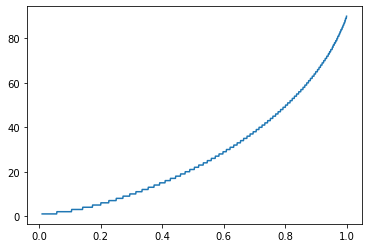

In [182]:
plt.plot(arrcom,arrnum)

In [212]:
#according the slope ,the best n_components is 0.76
pca = PCA(n_components=0.85)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [98]:
pca1.fit(x)

PCA(copy=True, iterated_power='auto', n_components=0.2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [213]:
PCA = pca.transform(x)

In [189]:
pca2.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [190]:
PCA_feature = pca2.transform(x)

In [75]:
X = np.zeros(90)

In [76]:
X = PCA_feature

In [77]:
def draw_PCA(x , y):
    plt.scatter(x , y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

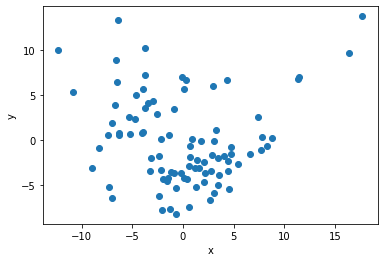

In [78]:
#draw PCA 2D result
draw_PCA(X[:,0],X[:,1])

# Cluster

In [79]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

In [214]:
maxClusters = 20
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(PCA)
    sse.append(kmeans.inertia_)

In [215]:
print(sse)

[37031.43371069172, 35956.168115245564, 35229.628025973965, 34264.68203575849, 33456.53824097693, 32705.988232614516, 31425.74578896031, 30856.595616418217, 30411.139675915598, 29607.97492616237, 29151.982640460606, 28516.554052856667, 27896.65831905923, 27370.67945526555, 26667.150915736238, 26072.211879791823, 25435.46822530406, 24583.90720093296]


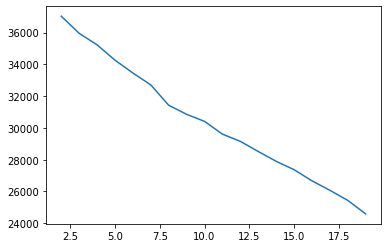

In [216]:
plt.plot(range(2,maxClusters),sse)

In [217]:
#find the best cluster_num
silh = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(PCA)
    silhouette_avg = silhouette_score(PCA_feature, kmeans.labels_)
    silh.append(silhouette_avg)

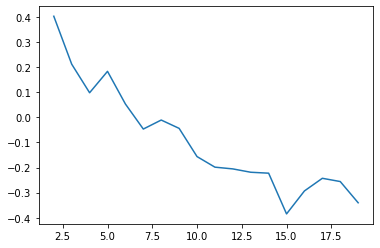

In [218]:
plt.plot(range(2,maxClusters),silh)

In [106]:
print (silh)

[0.4067211320637098, 0.46044924364579726, 0.39207330188132, 0.3586411421643718, 0.3622601272716357, 0.36529653435779336, 0.34807530972130124, 0.3734970104558112, 0.3676057114190038, 0.3645914806288033, 0.37971032844807595, 0.3849247758145708, 0.4017267244803742, 0.40548576295809774, 0.3951707997800988, 0.40624620607512674, 0.40957630018926106, 0.4019111009544741]


In [219]:
kmeans = KMeans(n_clusters=15, random_state=0).fit(PCA_feature1)

In [220]:
#use kmeans.predict to define "cluster"
kmeans_per = kmeans.predict(PCA_feature1)

In [221]:
df_PCA = pd.DataFrame(PCA_feature1)

In [222]:
#add kmeans.predict into PCA_result
df_PCA['cluster'] = kmeans_per

In [223]:
df_PCA.head()

,0,1,2,3,4,cluster
0,3.067902,-5.814164,-1.154487,-0.858704,2.191013,0
1,0.110119,5.667564,8.699337,-0.317789,-5.939190,10
2,2.111905,-2.444162,5.630689,-5.553731,-7.682892,6
3,11.394363,6.782069,5.532215,-9.818502,4.027806,3
4,7.839433,0.323029,3.924113,-5.920509,0.959175,3


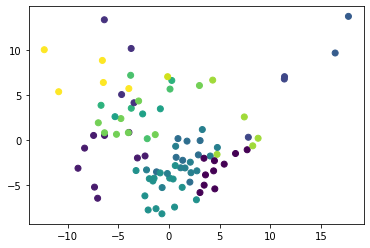

In [224]:
#show the Cluster'result 
plt.scatter(df_PCA[0],df_PCA[1] ,c= df_PCA['cluster'])